## Contents
-  [1.Importing Libraries](#1)
-  [2.Dataset Managament](#2)
    -  [2.1.Downloading and Extracting Dataset](#2.1)
    -  [2.2.Visualizing Dataset](#2.2)
    -  [2.3.Splitting Dataset](#2.3)
    -  [2.4.Pytorch DataLoaders](#2.4)
-  [3.Initializing pre-trained model](#3)
-  [4.Training](#4)
-  [5.Plotting Results](#5)
    -  [5.1.Plotting Loss vs MiniBatch](#5.1)
    -  [5.2.Plotting Accuracy vs MiniBatch](#5.2)
    -  [5.3.Plotting Loss vs Epoch](#5.3)
    -  [5.4.Plotting Accuracy vs Epoch](#5.4)
    -  [5.5.Plotting F1 Score vs Epoch](#5.5)
    -  [5.6.Plotting Recall vs Epoch](#5.6)
    -  [5.7.Plotting Precision vs Epoch](#5.7)
-  [6.Testing](#6)

### 1.Importing Libraries <a class="anchor" id="1"></a>

In [1]:
!pip install timm
import timm

/home/frozenwolf/miniconda3/lib/python3.7/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /home/frozenwolf/miniconda3/lib/python3.7/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE
  warn(f"Failed to load image Python extension: {e}")


In [2]:
import torch
import torch.nn as nn
from torchvision import models
import torch.nn.functional as F
import torchvision.transforms as T
from torch.utils.data import Dataset as Dataset
from torch.utils.data import DataLoader as DataLoader
from sklearn import cluster
from zipfile import ZipFile
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from PIL import Image
import os
import random
import pickle

torch.cuda.empty_cache()
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)

sns.set_style("darkgrid")
plt.rcParams["figure.figsize"] = (10,10)


### 2.Dataset Managament <a class="anchor" id="2"></a>

#### 1.Downloading and Extracting Dataset <a class="anchor" id="2.1"></a>

In [3]:
path = "electricity-dataset/"
labels = {os.listdir(path)[i]:i for i in range(3)}


train_img = {}
train_label = []

test_img = {}
test_label = []

val_img = {}
val_label = []

database_img = {}

for i in os.listdir(path):
    for j in os.listdir(path+i):
        if "test" in j:
            test_img[labels[i]] =[path+i+'/'+j+'/'+k for k in os.listdir(path+i+'/'+j)]

        else:
            train_img[labels[i]] =[path+i+'/'+j+'/'+k for k in os.listdir(path+i+'/'+j)]

            val_img[labels[i]] =train_img[labels[i]][-4:]
            
            train_img[labels[i]]  = train_img[labels[i]][:-4]

            database_img[labels[i]] = train_img[labels[i]][-10:]
            
#             train_img = train_img[:-8]

#### 2.Visualizing Dataset <a class="anchor" id="2.2"></a>

#### 3.Splitting Dataset <a class="anchor" id="2.3"></a>

#### 4.Pytorch DataLoaders <a class="anchor" id="2.4"></a>

In [4]:
import random
import itertools
from PIL import Image

class Dataset(Dataset):
    def __init__(self,x,transform = 'T.Resize((224,224))'):
        self.transform = transform
        self.x = x
        self.len = (3*len(self.x[0]))
   
    def __len__(self):
        return self.len
    
    def __getitem__(self,i):
        x = [0,1,2]
        c1 = random.choice(x)
#         print(c1)
        x.remove(c1)
        c2 = random.choice(x)
        
        anchor_i = random.randrange(len(self.x[c1]))
        i1 = random.randrange(len(self.x[c1]))
        i2 = random.randrange(len(self.x[c2]))
        
        anchor = Image.open(self.x[c1][anchor_i]).convert('RGB')
        img1 = Image.open(self.x[c1][i1]).convert('RGB')
        img2 = Image.open(self.x[c2][i2]).convert('RGB')
            
        return torch.FloatTensor(np.asarray(self.transform(anchor))), torch.FloatTensor(np.asarray(self.transform(img1))), torch.FloatTensor(np.asarray(self.transform(img2))),torch.LongTensor([1]), torch.LongTensor([0])


batch_size = 16

transforms_train = T.Compose([
        T.Resize((224,224)),
        T.RandomRotation(degrees=(-10, 10)),
        T.RandomHorizontalFlip(),
#         T.RandomGrayscale(0.5),
#         T.RandomVerticalFlip(),
        T.ToTensor(),
        
    ])

transforms_test = T.Compose([
        T.Resize((224,224)),
        T.ToTensor(),
    ])

train_dataset = Dataset(train_img,transform =transforms_train)
validation_dataset = Dataset(val_img,transform =transforms_test)
test_dataset = Dataset(test_img,transform =transforms_test)

train_dataloader = DataLoader(train_dataset , batch_size = batch_size , shuffle = True )
validation_dataloader = DataLoader(validation_dataset , batch_size = batch_size , shuffle = True )
test_dataloader = DataLoader(test_dataset , batch_size = batch_size , shuffle = True )

In [5]:
next(iter(test_dataloader))

[tensor([[[[0.3765, 0.6667, 0.7686,  ..., 0.8471, 0.7882, 0.8000],
           [0.2588, 0.5176, 0.7373,  ..., 0.9294, 0.8902, 0.8549],
           [0.1765, 0.3373, 0.6392,  ..., 0.9686, 0.9608, 0.9529],
           ...,
           [0.1333, 0.1373, 0.1412,  ..., 0.2353, 0.2353, 0.2353],
           [0.1333, 0.1373, 0.1412,  ..., 0.2353, 0.2353, 0.2353],
           [0.1333, 0.1373, 0.1412,  ..., 0.2353, 0.2353, 0.2353]],
 
          [[0.3490, 0.5961, 0.6784,  ..., 0.8980, 0.8392, 0.8627],
           [0.2431, 0.4667, 0.6549,  ..., 0.9608, 0.9333, 0.9059],
           [0.1765, 0.3059, 0.5647,  ..., 0.9725, 0.9725, 0.9686],
           ...,
           [0.1255, 0.1294, 0.1333,  ..., 0.2745, 0.2745, 0.2745],
           [0.1255, 0.1294, 0.1333,  ..., 0.2745, 0.2745, 0.2745],
           [0.1255, 0.1294, 0.1333,  ..., 0.2745, 0.2745, 0.2745]],
 
          [[0.3176, 0.5059, 0.5569,  ..., 0.9412, 0.9098, 0.9294],
           [0.2431, 0.4157, 0.5490,  ..., 0.9608, 0.9569, 0.9333],
           [0.1922, 0.30

### 3.Initializing pre-trained model <a class="anchor" id="3"></a>

In [6]:
import torch.nn.functional as F

class ViTBase16(nn.Module):
    def __init__(self, n_classes, pretrained=False):

        super(ViTBase16, self).__init__()

        self.model = timm.create_model("final", pretrained=False)
        self.model.head = nn.Linear(self.model.head.in_features, n_classes)

    def forward(self, x):
        x = self.model(x)
        return x


class MatchingModel(nn.Module):
    def __init__(self, device):

        super(MatchingModel, self).__init__()

        self.model_vit = ViTBase16(3, pretrained=True)

        self.model_vit.load_state_dict(torch.load("vit_tiny_patch16_224", map_location=torch.device(device)))

        self.model_vit.model.head = nn.Identity()
        
        self.T = T.Compose([T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
        

        for param in self.model_vit.parameters():
            param.requires_grad = False
            
        
#         self.l1 = nn.Linear(4,16)
#         self.l1 = nn.Linear(2,16)
        self.out = nn.Linear(1,1)
        
    
    def euclidean_dist(self, x1, x2):
        return (x1-x2).pow(2).sum(1)
            
    def forward(self, x1, x2, x3=None): #anchor, T, F
        x1_ = self.model_vit(x1) 
        x2_ = self.model_vit(x2)
                
        y2 = self.euclidean_dist(x1_, x2_).view(-1,1) #anchor - T      

        if x3 is not None:
            x3_ = self.model_vit(x3)
            y3 = self.euclidean_dist(x1_, x3_).view(-1,1) #anchor -F
       
        # return y2, y3
            return torch.sigmoid(self.out(y2)), torch.sigmoid(self.out(y3))
        
        else:
            return self.out(y2)

device = 'cuda'
model = MatchingModel(device='cuda')

model = model.to(device)

model.load_state_dict(torch.load("matching_1"))

for param in model.parameters():
    param.requires_grad = False

model.out = nn.Linear(1,2).to(device)

for param in model.out.parameters():
    param.requires_grad = True

model(torch.randn(2, 3, 224, 224).to('cuda'), torch.randn(2, 3, 224, 224).to('cuda'))

model_name = "final_matching"

### 4.Training <a class="anchor" id="4"></a>

In [7]:
lr = 0.001
epoch = 10
train_dataset_size = train_dataset.__len__()
validation_dataset_size = validation_dataset.__len__()
train_n_minibatches = train_dataloader.__len__()
validation_n_minibatches = validation_dataloader.__len__()


loss_history = [[],[]] #[[train], [validation]]
tri_loss_history = [[],[]]
accuracy_history = [[],[]] #[[train], [validation]]

criterion = nn.CrossEntropyLoss() 
optimizer = torch.optim.Adam(model.parameters(),lr = lr)

# class TripletLoss(nn.Module):
#     """
#     Triplet loss
#     Takes embeddings of an anchor sample, a positive sample and a negative sample
#     """

#     def __init__(self):
#         super(TripletLoss, self).__init__()

#     def forward(self, distance_positive, distance_negative, size_average=True):
#         losses = F.relu(distance_positive - distance_negative)
#         return losses.mean() if size_average else losses.sum()
    
# tripletloss = TripletLoss()

In [8]:
from sklearn.metrics import precision_recall_fscore_support, cohen_kappa_score
import gc

best_val_score = 10000000
best_acc_score = 0
results = [[],[], []]

for e in range(epoch):
    print(f'---------------------------------------EPOCH {e+1}-------------------------------------------')
    y_all_train_true = []
    y_all_train_pred = []
    y_all_val_true = []
    y_all_val_pred = []
    
    for batch_idx , (a, x1, x2 ,y1, y2) in enumerate(train_dataloader):
        torch.cuda.empty_cache()
        model.train() # Setting mode to train
        optimizer.zero_grad()
        
        x = torch.cat((x1, x2), dim=0)
        y = torch.cat((y1, y2), dim=0)
        a = torch.cat((a, a), dim=0)

        x , y, a = x.to(device) , y.to(device), a.to(device)
        y_pred = model(a, x)
        
        y_all_train_true+=y.cpu().detach().view(-1,).tolist()
        y_all_train_pred+=torch.argmax(y_pred, dim=1).detach().tolist()
        
        # Calculating Loss
        loss = criterion(y_pred,y.view(-1,))
        loss.backward()
        optimizer.step()
        loss_history[0].append(float(loss.detach()))
        
        #Calaculating Accuracy
        correct = 0
        y_pred = y_pred.cpu().detach().numpy().tolist()
        y = y.cpu().detach().numpy().tolist()
        for i in range(x.shape[0]):
            n = 0
            n = y_pred[i].index(max(y_pred[i]))
            if n == y[i][0]:
                correct = correct + 1
        accuracy_history[0].append((correct/x.shape[0])*100)

        del loss, x, y, y_pred
        gc.collect()
        
        if batch_idx % (len(train_dataloader)//2) == 0:
            # Printing Log
            print(f'LOSS for EPOCH {e+1} BATCH {batch_idx}/{train_n_minibatches} TRAIN LOSS : {loss_history[0][-1]}',end = ' ')
            print(f'TRAIN ACCURACY : {accuracy_history[0][-1]}',end = ' ')
            with torch.no_grad():
                # Calculating loss and accuracy for validation
                model.eval()
                for _batch_idx_ , (a, x1, x2 ,y1, y2) in enumerate(validation_dataloader):
                    torch.cuda.empty_cache()
                    x = torch.cat((x1, x2), dim=0)
                    y = torch.cat((y1, y2), dim=0)
                    a = torch.cat((a, a), dim=0)

                    x , y, a = x.to(device) , y.to(device), a.to(device)
                    y_pred = model(a, x)
                    
                    y_all_val_true+=y.cpu().detach().view(-1,).tolist()
                    y_all_val_pred+=torch.argmax(y_pred, dim=1).detach().tolist()
                    
                    validation_loss = criterion(y_pred,y.view(-1,))
                    loss_history[1].append(float(validation_loss.detach()))
                    
                    correct = 0
                    y_pred = y_pred.cpu().detach().numpy().tolist()
                    y = y.cpu().detach().numpy().tolist()      
                    for i in range(x.shape[0]):
                        n = 0
                        n = y_pred[i].index(max(y_pred[i]))
                        if n == y[i][0]:
                            correct = correct + 1
                    accuracy_history[1].append((correct/x.shape[0])*100)
                        
                    del validation_loss, x, y, y_pred
                    gc.collect()   

                print(f'VALIDATION LOSS : {sum(loss_history[1][-1:-validation_n_minibatches-1:-1])/validation_n_minibatches}',end = ' ')
                print(f'VALIDATION ACCURACY : {sum(accuracy_history[1][-1:-validation_n_minibatches-1:-1])/validation_n_minibatches}')
    
    # Saving the model progress
    torch.save(model.state_dict(),model_name)

    
    results[0].append(precision_recall_fscore_support(y_all_train_true,y_all_train_pred))
    results[1].append(precision_recall_fscore_support(y_all_val_true,y_all_val_pred))
    results[2].append([cohen_kappa_score(y_all_train_true,y_all_train_pred), cohen_kappa_score(y_all_val_true,y_all_val_pred)])
    
    #Log for e+1th epoch
    print(f'--------------------------------------------------------------------------------------------')
    print(f'Loss for EPOCH {e+1}  TRAIN LOSS : {sum(loss_history[0][-1:-train_n_minibatches-1:-1])/train_n_minibatches}',end = ' ')
    print(f'TRAIN PREC : {results[0][-1][0]} RECALL : {results[0][-1][1]} F1 : {results[0][-1][2]}',end=" ")
    print(f'ACC : {sum(accuracy_history[0][-1:-train_n_minibatches-1:-1])/train_n_minibatches}')
    print(f'VALIDATION LOSS for EPOCH {e+1} : {sum(loss_history[1][-1:-1*validation_n_minibatches-1:-1])/validation_n_minibatches}',end = ' ')
    print(f'VALIDATION PREC : {results[1][-1][0]} RECALL : {results[1][-1][1]} F1 : {results[1][-1][2]}',end=" ")
    print(f' ACC : {sum(accuracy_history[1][-1:-1*validation_n_minibatches-1:-1])/validation_n_minibatches}')
    print(f' TRAIN KAPPA : {results[2][-1][0]} VAL KAPPA : {results[2][-1][1]}')
    print('---------------------------------------------------------------------------------------------')

---------------------------------------EPOCH 1-------------------------------------------
LOSS for EPOCH 1 BATCH 0/12 TRAIN LOSS : 67.75080871582031 TRAIN ACCURACY : 50.0 VALIDATION LOSS : 53.74551010131836 VALIDATION ACCURACY : 41.66666666666667
LOSS for EPOCH 1 BATCH 6/12 TRAIN LOSS : 46.27323532104492 TRAIN ACCURACY : 50.0 VALIDATION LOSS : 40.8062744140625 VALIDATION ACCURACY : 29.166666666666668


/home/frozenwolf/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


--------------------------------------------------------------------------------------------
Loss for EPOCH 1  TRAIN LOSS : 45.54950777689616 TRAIN PREC : [0.  0.5] RECALL : [0. 1.] F1 : [0.         0.66666667] ACC : 50.0
VALIDATION LOSS for EPOCH 1 : 40.8062744140625 VALIDATION PREC : [0.         0.41463415] RECALL : [0.         0.70833333] F1 : [0.         0.52307692]  ACC : 29.166666666666668
 TRAIN KAPPA : 0.0 VAL KAPPA : -0.29166666666666674
---------------------------------------------------------------------------------------------
---------------------------------------EPOCH 2-------------------------------------------
LOSS for EPOCH 2 BATCH 0/12 TRAIN LOSS : 28.119102478027344 TRAIN ACCURACY : 50.0 VALIDATION LOSS : 23.408220291137695 VALIDATION ACCURACY : 37.5
LOSS for EPOCH 2 BATCH 6/12 TRAIN LOSS : 8.684379577636719 TRAIN ACCURACY : 50.0 VALIDATION LOSS : 6.044841289520264 VALIDATION ACCURACY : 45.83333333333333
--------------------------------------------------------------

/home/frozenwolf/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/frozenwolf/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


--------------------------------------------------------------------------------------------
Loss for EPOCH 3  TRAIN LOSS : 4.9765230019887285 TRAIN PREC : [0.5 0. ] RECALL : [1. 0.] F1 : [0.66666667 0.        ] ACC : 50.0
VALIDATION LOSS for EPOCH 3 : 5.758436679840088 VALIDATION PREC : [0.5 0. ] RECALL : [1. 0.] F1 : [0.66666667 0.        ]  ACC : 50.0
 TRAIN KAPPA : 0.0 VAL KAPPA : 0.0
---------------------------------------------------------------------------------------------
---------------------------------------EPOCH 4-------------------------------------------
LOSS for EPOCH 4 BATCH 0/12 TRAIN LOSS : 5.251351833343506 TRAIN ACCURACY : 50.0 VALIDATION LOSS : 5.8720221519470215 VALIDATION ACCURACY : 50.0
LOSS for EPOCH 4 BATCH 6/12 TRAIN LOSS : 3.1812500953674316 TRAIN ACCURACY : 50.0 VALIDATION LOSS : 3.0664196014404297 VALIDATION ACCURACY : 50.0


/home/frozenwolf/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/frozenwolf/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


--------------------------------------------------------------------------------------------
Loss for EPOCH 4  TRAIN LOSS : 3.231385201215744 TRAIN PREC : [0.5 0. ] RECALL : [1. 0.] F1 : [0.66666667 0.        ] ACC : 50.0
VALIDATION LOSS for EPOCH 4 : 3.0664196014404297 VALIDATION PREC : [0.5 0. ] RECALL : [1. 0.] F1 : [0.66666667 0.        ]  ACC : 50.0
 TRAIN KAPPA : 0.0 VAL KAPPA : 0.0
---------------------------------------------------------------------------------------------
---------------------------------------EPOCH 5-------------------------------------------
LOSS for EPOCH 5 BATCH 0/12 TRAIN LOSS : 0.7998297810554504 TRAIN ACCURACY : 50.0 VALIDATION LOSS : 0.9437876343727112 VALIDATION ACCURACY : 20.833333333333336
LOSS for EPOCH 5 BATCH 6/12 TRAIN LOSS : 1.3247463703155518 TRAIN ACCURACY : 43.75 VALIDATION LOSS : 0.8706253170967102 VALIDATION ACCURACY : 16.666666666666664
--------------------------------------------------------------------------------------------
Loss for E

/home/frozenwolf/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


--------------------------------------------------------------------------------------------
Loss for EPOCH 6  TRAIN LOSS : 1.066765199104945 TRAIN PREC : [0.43389831 0.2       ] RECALL : [0.71111111 0.07222222] F1 : [0.53894737 0.10612245] ACC : 36.71875
VALIDATION LOSS for EPOCH 6 : 0.7670168876647949 VALIDATION PREC : [0.5 0. ] RECALL : [1. 0.] F1 : [0.66666667 0.        ]  ACC : 50.0
 TRAIN KAPPA : -0.21666666666666656 VAL KAPPA : 0.0
---------------------------------------------------------------------------------------------
---------------------------------------EPOCH 7-------------------------------------------
LOSS for EPOCH 7 BATCH 0/12 TRAIN LOSS : 0.8023732900619507 TRAIN ACCURACY : 50.0 VALIDATION LOSS : 0.7582476139068604 VALIDATION ACCURACY : 50.0
LOSS for EPOCH 7 BATCH 6/12 TRAIN LOSS : 0.8606985211372375 TRAIN ACCURACY : 50.0 VALIDATION LOSS : 0.7577590346336365 VALIDATION ACCURACY : 50.0


/home/frozenwolf/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


--------------------------------------------------------------------------------------------
Loss for EPOCH 7  TRAIN LOSS : 0.8318158785502116 TRAIN PREC : [0.49152542 0.        ] RECALL : [0.96666667 0.        ] F1 : [0.65168539 0.        ] ACC : 45.3125
VALIDATION LOSS for EPOCH 7 : 0.7577590346336365 VALIDATION PREC : [0.5 0. ] RECALL : [1. 0.] F1 : [0.66666667 0.        ]  ACC : 50.0
 TRAIN KAPPA : -0.03333333333333344 VAL KAPPA : 0.0
---------------------------------------------------------------------------------------------
---------------------------------------EPOCH 8-------------------------------------------
LOSS for EPOCH 8 BATCH 0/12 TRAIN LOSS : 0.8293104767799377 TRAIN ACCURACY : 21.875 VALIDATION LOSS : 0.7755748629570007 VALIDATION ACCURACY : 50.0
LOSS for EPOCH 8 BATCH 6/12 TRAIN LOSS : 0.7961516380310059 TRAIN ACCURACY : 50.0 VALIDATION LOSS : 0.837378740310669 VALIDATION ACCURACY : 50.0


/home/frozenwolf/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


--------------------------------------------------------------------------------------------
Loss for EPOCH 8  TRAIN LOSS : 0.7899898042281469 TRAIN PREC : [0.48717949 0.        ] RECALL : [0.95 0.  ] F1 : [0.6440678 0.       ] ACC : 47.65625
VALIDATION LOSS for EPOCH 8 : 0.837378740310669 VALIDATION PREC : [0.5 0. ] RECALL : [1. 0.] F1 : [0.66666667 0.        ]  ACC : 50.0
 TRAIN KAPPA : -0.050000000000000044 VAL KAPPA : 0.0
---------------------------------------------------------------------------------------------
---------------------------------------EPOCH 9-------------------------------------------
LOSS for EPOCH 9 BATCH 0/12 TRAIN LOSS : 0.7862909436225891 TRAIN ACCURACY : 50.0 VALIDATION LOSS : 0.7745001912117004 VALIDATION ACCURACY : 50.0
LOSS for EPOCH 9 BATCH 6/12 TRAIN LOSS : 0.7679959535598755 TRAIN ACCURACY : 50.0 VALIDATION LOSS : 0.7606303095817566 VALIDATION ACCURACY : 50.0


/home/frozenwolf/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/frozenwolf/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


--------------------------------------------------------------------------------------------
Loss for EPOCH 9  TRAIN LOSS : 0.7683874815702438 TRAIN PREC : [0.5 0. ] RECALL : [1. 0.] F1 : [0.66666667 0.        ] ACC : 50.0
VALIDATION LOSS for EPOCH 9 : 0.7606303095817566 VALIDATION PREC : [0.5 0. ] RECALL : [1. 0.] F1 : [0.66666667 0.        ]  ACC : 50.0
 TRAIN KAPPA : 0.0 VAL KAPPA : 0.0
---------------------------------------------------------------------------------------------
---------------------------------------EPOCH 10-------------------------------------------
LOSS for EPOCH 10 BATCH 0/12 TRAIN LOSS : 0.7634957432746887 TRAIN ACCURACY : 50.0 VALIDATION LOSS : 0.762097179889679 VALIDATION ACCURACY : 50.0
LOSS for EPOCH 10 BATCH 6/12 TRAIN LOSS : 0.7591286301612854 TRAIN ACCURACY : 50.0 VALIDATION LOSS : 0.7647104859352112 VALIDATION ACCURACY : 50.0
--------------------------------------------------------------------------------------------
Loss for EPOCH 10  TRAIN LOSS : 0.76

/home/frozenwolf/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/frozenwolf/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 5.Plotting results <a class="anchor" id="4"></a>

#### 1.Plotting Loss vs MiniBatch<a class="anchor" id="5.1"></a>

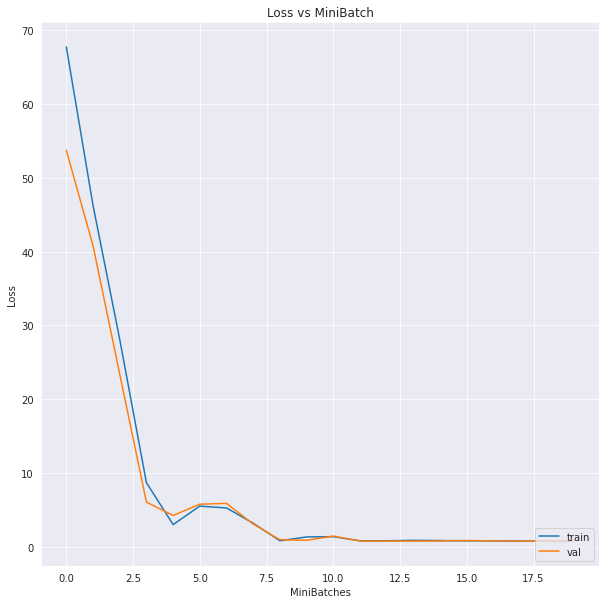

In [9]:
sns.lineplot(x=range(len(loss_history[1])),y=loss_history[0][::len(loss_history[0])//len(loss_history[1])][:len(loss_history[1])])
sns.lineplot(x=range(len(loss_history[1])),y=loss_history[1])

plt.legend(loc='lower right', labels=['train', 'val'])
plt.title("Loss vs MiniBatch")
plt.xlabel('MiniBatches')
plt.ylabel('Loss')


plt.show()


#### 2.Plotting Accuracy vs MiniBatch<a class="anchor" id="5.2"></a>

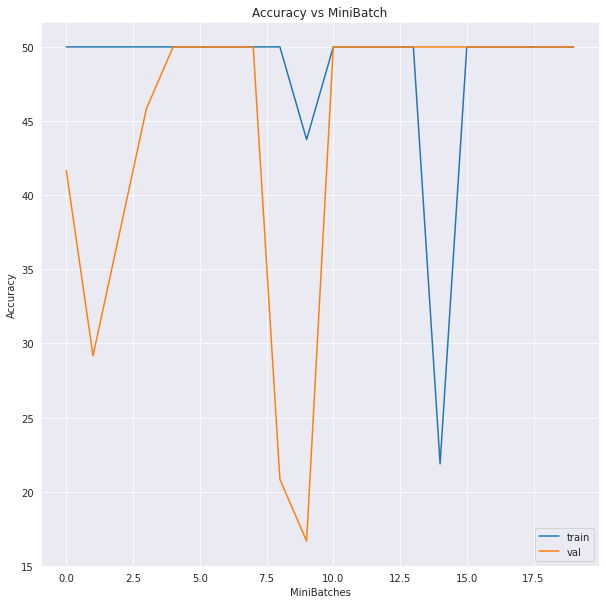

In [10]:
sns.lineplot(x=range(len(accuracy_history[1])),y=accuracy_history[0][::len(accuracy_history[0])//len(accuracy_history[1])][:len(accuracy_history[1])])
sns.lineplot(x=range(len(accuracy_history[1])),y=accuracy_history[1])

plt.legend(loc='lower right', labels=['train', 'val'])
plt.title("Accuracy vs MiniBatch")
plt.xlabel('MiniBatches')
plt.ylabel('Accuracy')

plt.show()


#### 3.Plotting Loss vs Epoch<a class="anchor" id="5.3"></a>

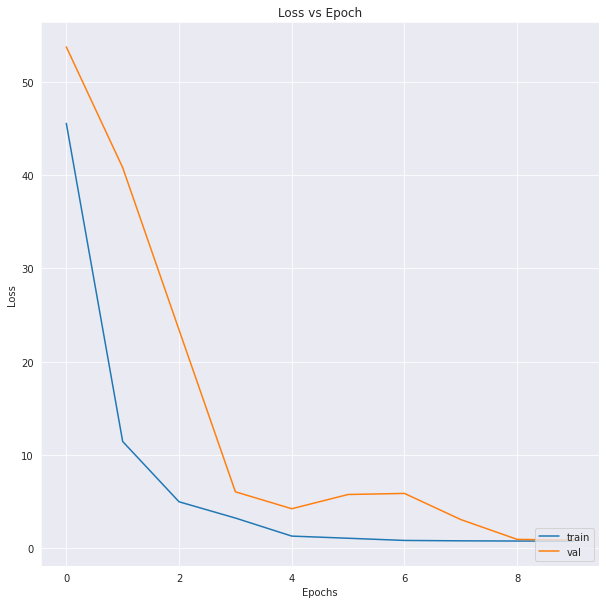

In [11]:
# Plotting Loss per epoch
loss_per_epoch = [[],[]]
for i in range(epoch):
    temp = 0
    for j in loss_history[0][i*train_n_minibatches:(i+1)*train_n_minibatches]:
        temp = temp + j
    loss_per_epoch[0].append(temp/train_n_minibatches)
    temp = 0
    for j in loss_history[1][i*validation_n_minibatches:(i+1)*validation_n_minibatches]:
        temp = temp + j
    loss_per_epoch[1].append(temp/validation_n_minibatches)    

sns.lineplot(x=range(len(loss_per_epoch[0])),y=loss_per_epoch[0])
sns.lineplot(x=range(len(loss_per_epoch[1])),y=loss_per_epoch[1])

plt.legend(loc='lower right', labels=['train', 'val'])
plt.title("Loss vs Epoch")
plt.xlabel('Epochs')
plt.ylabel('Loss')


plt.show()

#### 4.Plotting Accuracy vs Epoch<a class="anchor" id="5.4"></a>

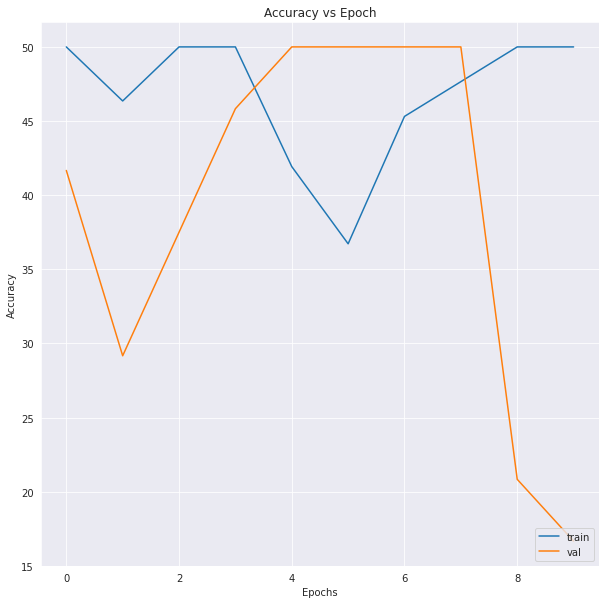

In [12]:
# Plotting Accuracy per epoch
accuracy_per_epoch = [[],[]]
for i in range(epoch):
    temp = 0
    for j in accuracy_history[0][i*train_n_minibatches:(i+1)*train_n_minibatches]:
        temp = temp + j
    accuracy_per_epoch[0].append(temp/train_n_minibatches)
    temp = 0
    for j in accuracy_history[1][i*validation_n_minibatches:(i+1)*validation_n_minibatches]:
        temp = temp + j
    accuracy_per_epoch[1].append(temp/validation_n_minibatches)    

sns.lineplot(x=range(len(accuracy_per_epoch[0])),y=accuracy_per_epoch[0])
sns.lineplot(x=range(len(accuracy_per_epoch[1])),y=accuracy_per_epoch[1])

plt.legend(loc='lower right', labels=['train', 'val'])
plt.title("Accuracy vs Epoch")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

#### 5.Plotting F1Score vs Epoch<a class="anchor" id="5.4"></a>

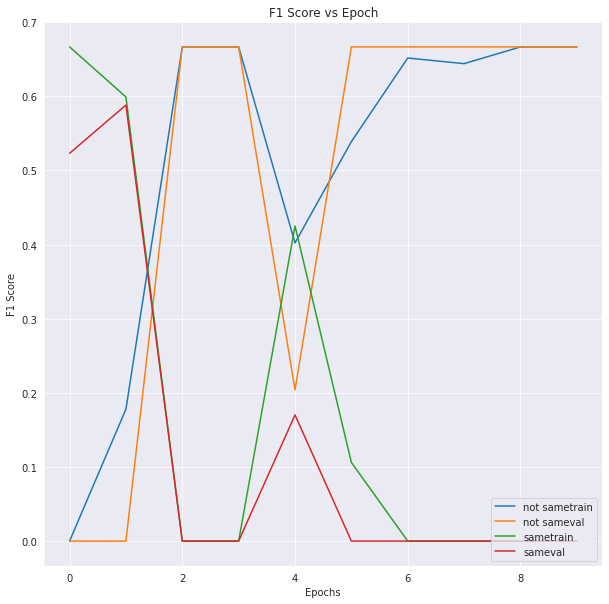

In [13]:
labels = {0:"not same", 1:"same"}

legend = []

for j in range(2):
    sns.lineplot(x=range(len(results[0])),y=[results[0][i][2][j] for i in range(len(results[0]))])
    sns.lineplot(x=range(len(results[1])),y=[results[1][i][2][j] for i in range(len(results[1]))])
    legend+=[labels[j]+'train', labels[j]+'val']



plt.legend(loc='lower right', labels=legend)
plt.title("F1 Score vs Epoch")
plt.xlabel('Epochs')
plt.ylabel('F1 Score')


plt.show()

#### 6.Plotting Recall vs Epoch<a class="anchor" id="5.4"></a>

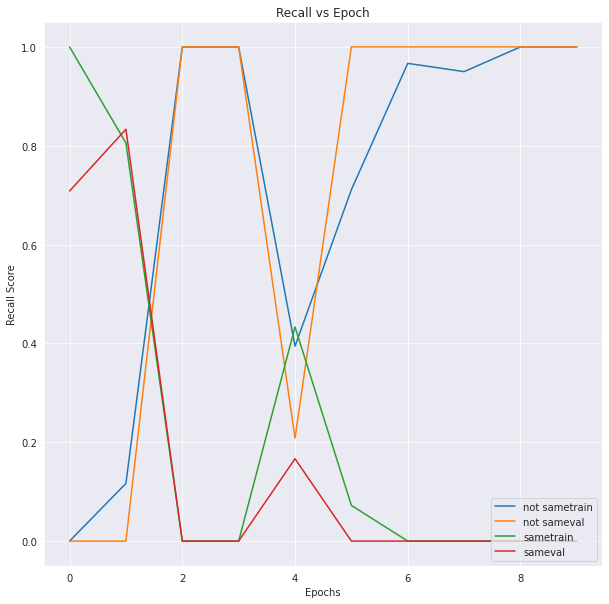

In [14]:
for j in range(2):
    sns.lineplot(x=range(len(results[0])),y=[results[0][i][1][j] for i in range(len(results[0]))])
    sns.lineplot(x=range(len(results[1])),y=[results[1][i][1][j] for i in range(len(results[1]))])


plt.legend(loc='lower right', labels=legend)
plt.title("Recall vs Epoch")
plt.xlabel('Epochs')
plt.ylabel('Recall Score')


plt.show()

#### 6.Plotting Precision vs Epoch<a class="anchor" id="5.4"></a>

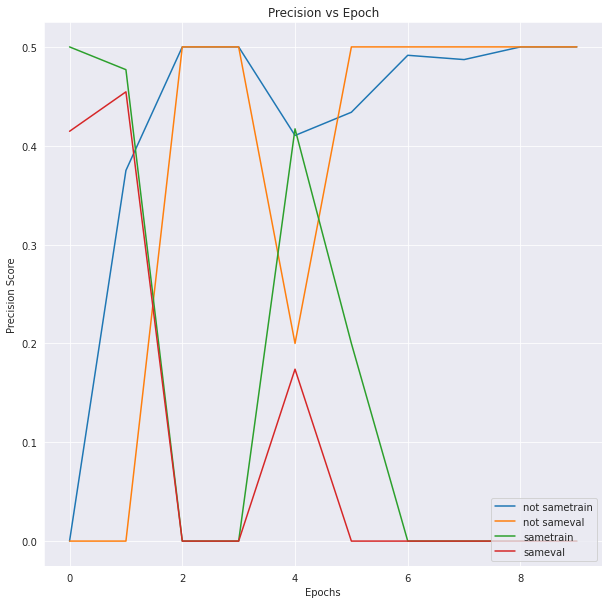

In [15]:
for j in range(2):
    sns.lineplot(x=range(len(results[0])),y=[results[0][i][0][j] for i in range(len(results[0]))])
    sns.lineplot(x=range(len(results[1])),y=[results[1][i][0][j] for i in range(len(results[1]))])


plt.legend(loc='lower right', labels=legend)
plt.title("Precision vs Epoch")
plt.xlabel('Epochs')
plt.ylabel('Precision Score')


plt.show()

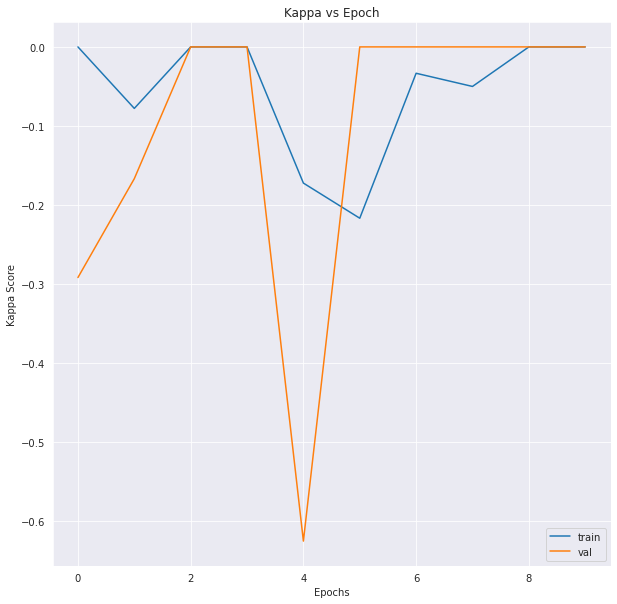

In [16]:

sns.lineplot(x=range(len(results[2])),y=[results[2][i][0] for i in range(len(results[2]))])
sns.lineplot(x=range(len(results[2])),y=[results[2][i][1] for i in range(len(results[2]))])


plt.legend(loc='lower right', labels=["train", "val"])
plt.title("Kappa vs Epoch")
plt.xlabel('Epochs')
plt.ylabel('Kappa Score')


plt.show()

### 6.Testing <a class="anchor" id="4"></a>

In [17]:
import gc

test_loss_history = []
test_accuracy_history = []
y_all_true = []
y_all_pred = []
#Testing the model on test dataset
# model = model.to('cuda')
model.eval()
for _batch_idx_ , (a, x1, x2 ,y1, y2) in enumerate(test_dataloader):
    torch.cuda.empty_cache()
    x = torch.cat((x1, x2), dim=0)
    y = torch.cat((y1, y2), dim=0)
    a = torch.cat((a, a), dim=0)
    x , y, a = x.to(device) , y.to(device), a.to(device)
    y_pred = model(a, x)

    test_loss = criterion(y_pred,y.view(-1,))
    test_loss_history.append(float(test_loss.detach()))
    correct = 0

    y_all_true+=y.cpu().detach().view(-1,).tolist()
    y_all_pred+=torch.argmax(y_pred, dim=1).detach().tolist()

    y_pred = y_pred.cpu().detach().numpy().tolist()
    y = y.cpu().detach().numpy().tolist()      
    for i in range(x.shape[0]):
        n = 0
        n = y_pred[i].index(max(y_pred[i]))
        if n == y[i][0]:
            correct = correct + 1
    test_accuracy_history.append((correct/len(y))*100)

    del x, y, y_pred, test_loss
    gc.collect()
                        
print(f'LOSS : {sum(test_loss_history)/len(test_loss_history)}  ACCURACY : {sum(test_accuracy_history)/len(test_accuracy_history)}')       

result = precision_recall_fscore_support(y_all_true,y_all_pred)

print(f"TEST PREC: {result[0]} RECALL: {result[1]} F1 SCORE: {result[2]} SUPPORT: {result[3]} COHEN KAPPA : {cohen_kappa_score(y_all_true,y_all_pred)}")


LOSS : 0.7611644864082336  ACCURACY : 50.0
TEST PREC: [0.5 0. ] RECALL: [1. 0.] F1 SCORE: [0.66666667 0.        ] SUPPORT: [54 54] COHEN KAPPA : 0.0


/home/frozenwolf/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
